In [21]:
%matplotlib inline

import os
import json
import datetime
from collections import defaultdict

import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


SAMPLE_DIR = './station-data/'

In [22]:
def ReadSnapshot(filename):
    with open(filename, 'rt') as f:
        data = json.load(f)
    return data

def ReadStationSample(sampleDir):
    sample = defaultdict(lambda : dict())
    stationNames = dict()
    for filename in os.listdir(sampleDir):
        timestamp = int(os.path.splitext(filename)[0].split('_')[2])
        snapshot = ReadSnapshot(os.path.join(sampleDir, filename))
        for station in snapshot:
            stationNames[station['number']] = station['name']
            sample[station['number']][timestamp] = station
    return stationNames, sample

def FindStations(stations, targetName):
    targetName = targetName.lower()
    return [ number for number, name in stations.items() if targetName in name.lower() ]

In [23]:
stations, sample = ReadStationSample(SAMPLE_DIR)

In [24]:
def GenerateBikeAvailabilityStats(sample):
    stats = defaultdict(lambda : dict())
    for stationNumber, stationSnapshots in sample.items():
        for timestamp, snapshot in stationSnapshots.items():
            stats[stationNumber][timestamp] = snapshot['available_bikes']# / snapshot['bike_stands']
    return stats

def GenerateStandAvailabilityStats(sample):
    stats = defaultdict(lambda : dict())
    for stationNumber, stationSnapshots in sample.items():
        for timestamp, snapshot in stationSnapshots.items():
            stats[stationNumber][timestamp] = snapshot['available_bike_stands']# / snapshot['bike_stands']
    return stats

In [25]:
bikeStats = GenerateBikeAvailabilityStats(sample)
standStats = GenerateStandAvailabilityStats(sample)

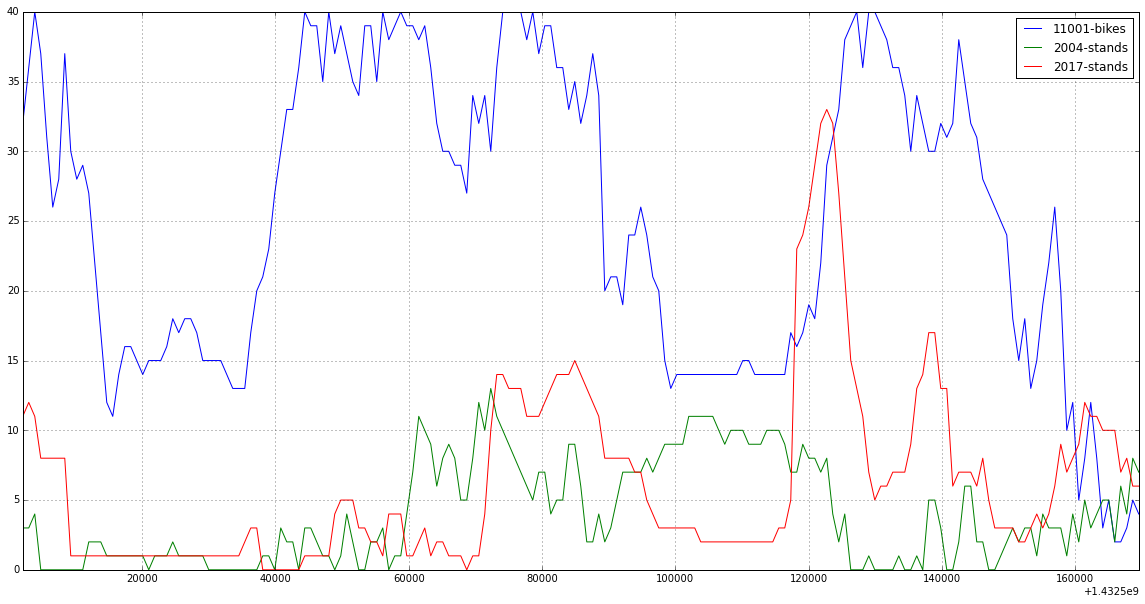

In [26]:
takeStations = FindStations(stations, 'bastille richard lenoir')
dropStations = FindStations(stations, 'caire') + FindStations(stations, 'reaumur')

curves = dict()
curves.update(dict( (str(station)+'-bikes', bikeStats[station]) for station in takeStations ))
curves.update(dict( (str(station)+'-stands', standStats[station]) for station in dropStations ))
ts = DataFrame(curves)
ts.plot(kind='line', figsize=(20,10))
#plt.plot(index=ts.index.to_datetime(), data=ts.values())